In [30]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('../data/10k_restaraunt_with_predicted.csv')
df = df[df['pred_stars'] != 0 ]
df = df[df['stars'] != 0]

In [28]:
df.columns

Index(['Unnamed: 0', 'id', 'business_id', 'user_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', 'pred_stars'],
      dtype='object')

In [23]:
sns.set_style("whitegrid")

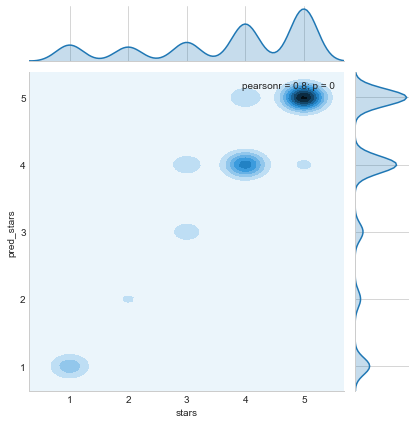

In [31]:
sns_plot = sns.jointplot(x="stars", y="pred_stars", data=df, kind="kde")

In [32]:
sns_plot.savefig("kde_bayesian_points.png")

(array([  1.99960008e-04,   0.00000000e+00,   2.33953209e-01,
          0.00000000e+00,   2.04759048e-01,   0.00000000e+00,
          2.72545491e-01,   0.00000000e+00,   5.35492901e-01,
          7.53049390e-01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

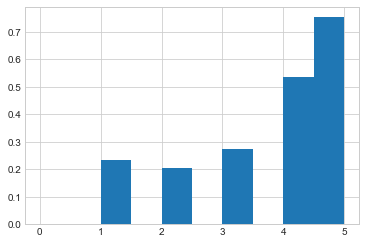

In [22]:
plt.hist(df['stars'],)

(array([ 1198.,     0.,   456.,     0.,     0.,   662.,     0.,  3439.,
            0.,  4239.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

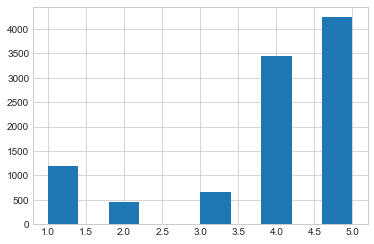

In [34]:
plt.hist(df['pred_stars'])

In [35]:
df.head()

Unnamed: 0                      id             business_id  \
0           0  hlpeSi-8jUVH9wi5F7V7Lg  hEcn9k6ONd5n2mq0lB2aew   
1           1  j6LgY0Tn7utjMuVY5aRKvg  C2BR0TjNacoNzItPLUHTAA   
2           2  iylX09P9t1kVBUFmoulVnA  _r-OvLO5wqncmsBCg3i0qw   
3           3  9xkBoZYlFSlRRz-4mrc70Q  ruPFtD9dU6Cv9_wpzIR4UQ   
4           4  D0EOKzTcCKq_7nZ6OtesNg  NpFtNc51LaZr8Y5_o2wRaw   

                  user_id  stars                 date  \
0  MaWfQRi7TEl3W72J5KKadw      4  2016-11-20 00:00:00   
1  W2K94WPhkHNHXMiaAIA7Jg      4  2016-01-28 00:00:00   
2  xrUwcIx4szcFlxFJ6waiFw      4  2016-04-08 00:00:00   
3  Ms78AU5hA0PY_CWgS0hUKg      2  2014-07-14 00:00:00   
4  eLzaX8tArcVTI9qOrZxHJw      4  2013-11-14 00:00:00   

                                                text  useful  funny  cool  \
0  Glad to have JB's in Sun City.  Food is the be...     1.0    0.0   1.0   
1  Very good food and they have longboard on tap....     0.0    0.0   0.0   
2  We were very happy that  we were able find/ord...     1.0    0.0   0.0   
3  This place has horrible customer service. I we...     2.0    0.0   0.0   
4  This is one of my favorite places to eat. The ...     0.0    0.0   0.0   

   pred_stars  
0           4  
1           4  
2           4  
3           1  
4           4

# Normal SVD

In [45]:
from surprise.model_selection import GridSearchCV

normal = df[['user_id','business_id','stars']]
#algo = SVD()
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(normal, reader)
#cross_validate(NormalPredictor(), data, cv=4)
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005, 0.009],
              'reg_all': [0.2, 0.4, 0.6, 0.8]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

In [49]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.36276026494
{'n_epochs': 20, 'lr_all': 0.009, 'reg_all': 0.8}


In [50]:
gs.best_score

{'mae': 1.1453173437659676, 'rmse': 1.3627602649359236}

# Bayesian SVD

In [47]:
from surprise.model_selection import GridSearchCV

bayesian = df[['user_id','business_id','pred_stars']]
#algo = SVD()
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(bayesian, reader)
#cross_validate(NormalPredictor(), data, cv=4)
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005, 0.009],
              'reg_all': [0.2, 0.4, 0.6, 0.8]}
gs_bayes = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs_bayes.fit(data)

In [51]:
# best RMSE score
print(gs_bayes.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_bayes.best_params['rmse'])

1.31422270084
{'n_epochs': 20, 'lr_all': 0.009, 'reg_all': 0.2}


In [53]:
gs_bayes.best_score

{'mae': 0.98489472236729381, 'rmse': 1.3142227008402301}

-0.03676470588235292

# Bayesian w/ Only 1,4,5

In [64]:
tokens = pd.read_csv('../data/tokenized_text.csv')

In [59]:
tokens.head()

Unnamed: 0             business_id                 user_id  \
0           0  hEcn9k6ONd5n2mq0lB2aew  MaWfQRi7TEl3W72J5KKadw   
1           1  C2BR0TjNacoNzItPLUHTAA  W2K94WPhkHNHXMiaAIA7Jg   
2           2  _r-OvLO5wqncmsBCg3i0qw  xrUwcIx4szcFlxFJ6waiFw   
3           3  ruPFtD9dU6Cv9_wpzIR4UQ  Ms78AU5hA0PY_CWgS0hUKg   
4           4  NpFtNc51LaZr8Y5_o2wRaw  eLzaX8tArcVTI9qOrZxHJw   

                                            nlp_text  stars  pred_stars  
0  ['glad', 'jbs', 'sun', 'city', 'food', 'best',...      4           4  
1  ['good', 'food', 'longboard', 'tap', 'fish', '...      4           4  
2  ['happy', 'able', 'findorder', 'pizza', 'son',...      4           4  
3  ['place', 'horrible', 'customer', 'service', '...      2           1  
4  ['one', 'favorite', 'places', 'eat', 'food', '...      4           4

In [65]:
tokens = tokens[tokens.stars.isin([1,4,5])]

In [66]:
tokens.head()

Unnamed: 0             business_id                 user_id  \
0           0  hEcn9k6ONd5n2mq0lB2aew  MaWfQRi7TEl3W72J5KKadw   
1           1  C2BR0TjNacoNzItPLUHTAA  W2K94WPhkHNHXMiaAIA7Jg   
2           2  _r-OvLO5wqncmsBCg3i0qw  xrUwcIx4szcFlxFJ6waiFw   
4           4  NpFtNc51LaZr8Y5_o2wRaw  eLzaX8tArcVTI9qOrZxHJw   
5           5  wY3dlpLa0BHfDENYAPYuZA  rnfgjemszUlQx6U_-PO63w   

                                            nlp_text  stars  pred_stars  
0  ['glad', 'jbs', 'sun', 'city', 'food', 'best',...      4           4  
1  ['good', 'food', 'longboard', 'tap', 'fish', '...      4           4  
2  ['happy', 'able', 'findorder', 'pizza', 'son',...      4           4  
4  ['one', 'favorite', 'places', 'eat', 'food', '...      4           4  
5  ['got', 'sick', 'eating', 'really', 'sick', 'w...      1           4

## Retrain Model

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
sparse = CountVectorizer().fit(tokens.nlp_text)
X = sparse.transform(tokens.nlp_text.apply(lambda x: str(x)))
y = tokens.stars.apply(lambda x: int(x))

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5432)

In [71]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from surprise.model_selection import GridSearchCV

normal = df[['user_id','business_id','stars']]
#algo = SVD()
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(normal, reader)
#cross_validate(NormalPredictor(), data, cv=4)
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005, 0.009],
              'reg_all': [0.2, 0.4, 0.6, 0.8]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)